In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Renaming files

In [73]:
import os
from os import listdir
from os.path import isfile, join

def format_file_names(rel_path='', name_style="img_{}", start_index=1):
    """
      Rename all files in the folder under rel_path.
      Keyword arguments:
      rel_path -- relative path to the folder (default 0.0)
      name_style -- file naming convention with incrementing integer (default "img_{}")
    """
    dir_path = os.path.abspath(os.getcwd())
    full_path = os.path.join(dir_path, rel_path)

    onlyfiles = [f for f in listdir(full_path) if isfile(join(full_path, f))]
    i = start_index

    for file in onlyfiles:
        infile = os.path.join(full_path, file)
        outfile = name_style.format(i) + ".jpg"

        if infile != outfile:
            os.rename(infile, os.path.join(full_path, outfile))
            i = i + 1
        else:
            print('Could not rename matching names {} and {}'.format(infile, outfile))

In [74]:
format_file_names('images/batch1')

## Creating classifications for files

In [133]:
import pandas as pd

In [134]:
output = pd.read_csv('output.csv')

In [135]:
output

,image,tag
0,img_2.jpg,welch
1,img_3.jpg,welch
2,img_4.jpg,welch
3,img_1.jpg,welch
4,img_8.jpg,other
5,img_9.jpg,other
6,img_10.jpg,other
7,img_11.jpg,other
8,img_12.jpg,other
9,img_13.jpg,other


In [136]:
# data doesn't look very random at first, so have to shuffle
output = output.sample(frac=1)

In [137]:
output = output[output.tag != 'sea'].dropna()

In [138]:
data = output.values

In [139]:
data

array([['img_28.jpg', 'other'],
       ['img_19.jpg', 'other'],
       ['img_8.jpg', 'other'],
       ['img_1.jpg', 'welch'],
       ['img_15.jpg', 'other'],
       ['img_21.jpg', 'other'],
       ['img_9.jpg', 'other'],
       ['img_25.jpg', 'other'],
       ['img_10.jpg', 'other'],
       ['img_13.jpg', 'other'],
       ['img_4.jpg', 'welch'],
       ['img_26.jpg', 'other'],
       ['img_14.jpg', 'other'],
       ['img_16.jpg', 'other'],
       ['img_22.jpg', 'other'],
       ['img_20.jpg', 'other'],
       ['img_24.jpg', 'other'],
       ['img_23.jpg', 'other'],
       ['img_27.jpg', 'other'],
       ['img_17.jpg', 'other'],
       ['img_2.jpg', 'welch'],
       ['img_32.jpg', 'other'],
       ['img_11.jpg', 'other'],
       ['img_3.jpg', 'welch'],
       ['img_31.jpg', 'welch'],
       ['img_12.jpg', 'other'],
       ['img_30.jpg', 'other'],
       ['img_29.jpg', 'other'],
       ['img_18.jpg', 'other']], dtype=object)

In [143]:
from PIL import Image

for file in data[:, 0]:
    img = Image.open("images/cropped/" + file)

    longer_side = max(img.size)
    horizontal_padding = (longer_side - img.size[0]) / 2
    vertical_padding = (longer_side - img.size[1]) / 2
    img5 = img.crop(
        (
            -horizontal_padding,
            -vertical_padding,
            img.size[0] + horizontal_padding,
            img.size[1] + vertical_padding
        )
    )

    img5.save("images/cropped/" + file)
    print('padded image {}'.format(file))

padded image img_28.jpg
padded image img_19.jpg
padded image img_8.jpg
padded image img_1.jpg
padded image img_15.jpg
padded image img_21.jpg
padded image img_9.jpg
padded image img_25.jpg
padded image img_10.jpg
padded image img_13.jpg
padded image img_4.jpg
padded image img_26.jpg
padded image img_14.jpg
padded image img_16.jpg
padded image img_22.jpg
padded image img_20.jpg
padded image img_24.jpg
padded image img_23.jpg
padded image img_27.jpg
padded image img_17.jpg
padded image img_2.jpg
padded image img_32.jpg
padded image img_11.jpg
padded image img_3.jpg
padded image img_31.jpg
padded image img_12.jpg
padded image img_30.jpg
padded image img_29.jpg
padded image img_18.jpg


In [198]:
def group_resize_images(files, scale=[64, 64]):
    from PIL import Image

    for file in files:
        file = "images/cropped/" + file
        
        try:
            im = Image.open(file)
            im.thumbnail(scale, Image.ANTIALIAS)
            im.save(file, "JPEG")
            print('scaled image {} to {}x{}'.format(file, scale[0], scale[1]))
        except IOError:
            print('cannot create thumbnail for {}'.format(file))

In [199]:
group_resize_images(data[:, 0])

scaled image images/cropped/img_28.jpg to 64x64
scaled image images/cropped/img_19.jpg to 64x64
scaled image images/cropped/img_8.jpg to 64x64
scaled image images/cropped/img_1.jpg to 64x64
scaled image images/cropped/img_15.jpg to 64x64
scaled image images/cropped/img_21.jpg to 64x64
scaled image images/cropped/img_9.jpg to 64x64
scaled image images/cropped/img_25.jpg to 64x64
scaled image images/cropped/img_10.jpg to 64x64
scaled image images/cropped/img_13.jpg to 64x64
scaled image images/cropped/img_4.jpg to 64x64
scaled image images/cropped/img_26.jpg to 64x64
scaled image images/cropped/img_14.jpg to 64x64
scaled image images/cropped/img_16.jpg to 64x64
scaled image images/cropped/img_22.jpg to 64x64
scaled image images/cropped/img_20.jpg to 64x64
scaled image images/cropped/img_24.jpg to 64x64
scaled image images/cropped/img_23.jpg to 64x64
scaled image images/cropped/img_27.jpg to 64x64
scaled image images/cropped/img_17.jpg to 64x64
scaled image images/cropped/img_2.jpg to 64x

## Loading data and splitting into training/test sets

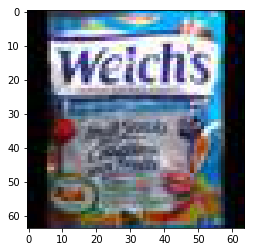

In [200]:
import PIL

I = np.asarray(PIL.Image.open('images/cropped/img_1.jpg'))
plt.imshow(I, interpolation='nearest')
plt.show()

In [201]:
I.shape

(64, 64, 3)

In [202]:
# shape is (200, 200, 3), so we will have to load this whole thing into a single numpy array
# after we load into a sinlge array shape should be (m, 200, 200, 3), where m is the number of examples

In [206]:
def load_images_arr(files):
    acc_arr = []
    
    for file in files:
        file = "images/cropped/" + file
        I = np.asarray(PIL.Image.open(file))
        acc_arr.append(I)
        
    return np.array(acc_arr)

In [207]:
data_set = load_images_arr(data[:, 0])

In [208]:
data_set.shape

(29, 64, 64, 3)

In [319]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [327]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_binary = le.fit_transform(data[:, 1])
y_binary

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0])

In [339]:
y_data = convert_to_one_hot(y_binary, 2)

In [351]:
y_data.shape

(2, 29)

In [396]:
def split_data(data, y, train_ratio):
    pos = int(data.shape[0] * train_ratio)
    
    return data[0: pos], y[:, 0: pos], data[pos + 1: ], y[:, pos + 1: ] 

In [418]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = split_data(data_set, y_data, 0.8) 

In [419]:
Y_train.shape

(2, 23)

In [420]:
x_train_flat = X_train.reshape(X_train_orig.shape[0], -1).T
x_test_flat = X_test.reshape(X_test_orig.shape[0], -1).T

In [421]:
x_train_flat.shape

(12288, 23)

In [422]:
# manual feature scaling
X_train = x_train_flat/255.
X_test = x_test_flat/255
Y_train = Y_train_orig
Y_test = Y_test_orig

In [423]:
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 23
number of test examples = 5
X_train shape: (12288, 23)
Y_train shape: (2, 23)
X_test shape: (12288, 5)
Y_test shape: (2, 5)


In [428]:
X_test_orig.shape

(5, 64, 64, 3)

## Model

In [403]:
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [404]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
#     permutation = list(np.random.permutation(m))
#     print(permutation)
#     print(Y.shape)
#     shuffled_X = X[:, permutation]
#     shuffled_Y = Y[:, permutation]
#     shuffled_Y = shuffled_Y.reshape((Y.shape[0], m))

    shuffled_X = X
    shuffled_Y = Y

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [405]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [406]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [2, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [2, 1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [407]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [408]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    ### END CODE HERE ###
    
    return cost

In [409]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001,
          num_epochs=500, minibatch_size=2, print_cost=True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                           # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print('###')
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        
        
        print(X_test.shape)
        print(Y_test.shape)
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 0.651566
Cost after epoch 100: 0.000553
Cost after epoch 200: 0.000139
Cost after epoch 300: 0.000053
Cost after epoch 400: 0.000023


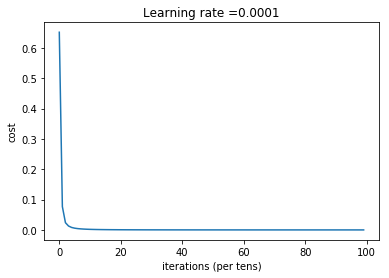

Parameters have been trained!
###
Train Accuracy: 1.0
(12288, 5)
(2, 5)
Test Accuracy: 1.0


In [410]:
X_test[0]parameters = model(X_train, Y_train, X_test, Y_test)

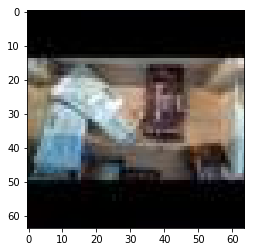

In [438]:
plt.imshow(X_test_orig[1], interpolation='nearest')
plt.show()